# Manifold Learning and Visualization: Nasdaq 100

In this notebook, we'll go through some of the manifold learning and network graphing features of <a href ="https://github.com/tynano/slicematrixIO-python/">slicematrixIO</a>. To begin, let's fire up a client in our California data center. Remember to substitute your api key in the code below. <p>Don't have a key yet? <a href = "http://www.slicematrix.com">Get your api key here</a></p>

In [ ]:
from slicematrixIO import SliceMatrix

api_key = "insert your key here"
sm = SliceMatrix(api_key, region = "us-west-1")

<p>Manifold learning is based on a powerful yet simple assumption about the true nature of data.</p>

> Data points live approximately on a manifold of much lower dimension than the input space

<p>Put simply: in any dataset of high enough dimension, the number of factors that are truly driving the dataset is far less than the actual number of input features. This can occur when high-dimensional data points are being generated by some process that may be difficult to understand directly from the input space, but which only has a few latent factors that control the v ariation in the data</p>

<p>Students of financial markets might be familiar with this concept through other names such as Fama-French, Factor Analysis, and Principal Components Analysis, to name a few. In all three of these algorithms, the practitioner views the chaos of the financial markets as a combination of a few factors. In the case of the first two models, we might judge that only a stock's individual returns might be modeled by just a few factors such as market capitalization and earnings per share, for example.</p> 

<p>PCA on the other hand attempts to construct these factors from the data itself. It might come as a surprise to some to know that PCA is one of the simplest forms of manifold learning, but it has many limitations. The most important of which is that PCA assumes the data live on a linear manifold. While PCA is great for discovering these kinds of relationships, in the real world data is hardly so well behaved.</p> 

<p>Luckily for us there are many more complex manifold learning algorithms to chose from. We'll explore one of the most powerful algorithms today: <b>the Isomap</b>.</p>

<p>This algorithm is good for discovering both linear and non-linear relationships within your datasets. Additionally, the Isomap is based on a powerful graphing algorithm so they are perfect for 1) classification, 2) regression, and 3) visualization of data. In particular, we'll use the isomap to visualize the price structure within the S&P 500 over the last year.</p>

To begin, let's import some useful libraries then download daily stock price data from Yahoo finance. The list of symbols for the S&P 500 comes from Quandl.

In [2]:
%matplotlib inline
import pandas as pd
from pandas_datareader import data as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://s3.amazonaws.com/static.quandl.com/tickers/nasdaq100.csv")

This next block loops through the available ticker symbols and attempts to download the stock price data from Yahoo, if available.

In [4]:
start = dt.datetime(2016, 3, 7)
end = dt.datetime(2017, 3, 7)

volume = []
closes = []
good_tickers = []
for ticker in data['ticker'].values.tolist():
    print ticker,
    try:
        vdata = web.DataReader(ticker, 'yahoo', start, end)
        cdata = vdata[['Close']]
        closes.append(cdata)
        vdata = vdata[['Volume']]
        volume.append(vdata)
        good_tickers.append(ticker)
    except:
        print "x",

FOXA FOX ATVI ADBE AKAM ALXN GOOGL GOOG AMZN AAL AMGN ADI AAPL AMAT ADSK ADP AVGO BIDU BBBY BIIB BMRN BRCM x CHRW CA CELG CERN CHTR CHKP CSCO CTXS CTSH CMCSK x CMCSA COST DISCA DISCK DISH DLTR EBAY EA EXPD ESRX FB FAST FISV GRMN GILD HSIC ILMN INCY INTC INTU ISRG JD KLAC GMCR x KHC LRCX LBTYA LBTYK QVCA LILA LILAK LMCK LMCA LVNTA LLTC MAR MAT MU MSFT MDLZ MNST MYL NTAP NFLX NVDA NXPI ORLY PCAR PAYX QCOM REGN ROST SNDK SBAC STX SIRI SWKS SPLS SBUX SRCL SYMC TSLA TXN PCLN TSCO TRIP VRSK VRTX VIAB VIP VOD WBA WDC WFM WYNN XLNX YHOO


In [5]:
closes = pd.concat(closes, axis = 1)
closes.columns = good_tickers

Now we'll take log-differences of the price data:

In [6]:
diffs = np.log(closes).diff().dropna(axis = 0, how = "all").dropna(axis = 1, how = "any")
diffs.head()

,FOXA,FOX,ATVI,ADBE,AKAM,ALXN,GOOGL,GOOG,AMZN,AAL,...,VRTX,VIAB,VIP,VOD,WBA,WDC,WFM,WYNN,XLNX,YHOO
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-08,-0.016260,-0.010722,-0.006477,-0.008970,-0.013648,-0.058992,0.001024,-0.001713,-0.004523,-0.032814,...,-0.045437,-0.025017,-0.036368,-0.005153,0.015545,-0.075261,-0.001191,-0.045302,-0.025144,-0.030799
2016-03-09,0.009066,0.008943,0.002596,0.010848,0.011114,-0.003623,0.016512,0.016109,-0.001411,0.021355,...,-0.026584,-0.005131,0.056570,-0.007129,0.014939,0.021305,0.010372,0.015943,0.010392,0.017460
2016-03-10,-0.009066,-0.003568,0.012558,-0.004938,-0.010016,-0.027122,0.009276,0.010691,-0.000966,-0.000480,...,-0.028161,-0.018430,-0.015114,-0.005871,-0.011586,0.009441,-0.025378,0.030192,-0.001077,-0.020806
2016-03-11,0.016977,0.007477,0.008603,0.013462,0.025835,0.018187,0.017197,0.019450,0.018928,0.019977,...,0.047238,0.028920,0.007585,0.029333,0.009255,0.040713,-0.000908,0.023514,0.007304,0.029719
2016-03-14,-0.003588,-0.001775,0.027845,0.011676,-0.014190,-0.034850,0.007183,0.005037,0.006579,0.002822,...,-0.007798,0.011891,0.002516,0.002538,0.001350,-0.034469,0.013528,-0.009809,0.005975,-0.006826


<p>We all know that correlations spurious. Additionally we know that, in the financial markets in particular, correlations between assets can ebb and flow in the same manner as prices. We can use the Isomap algorithm to visualize how price structure, i.e. which assets herd together, has changed over the course of the last year.</p>

To visualize this structure, let's create two different Isomap models: 1) for the first half of the year and 2) for the second half. This way we can compare the network graph structure between the two time periods.

In [7]:
iso1  = sm.Isomap(dataset = diffs.ix[0:(diffs.shape[0]/2)], D = 2, K = 6)
iso2  = sm.Isomap(dataset = diffs.ix[(diffs.shape[0]/2):], D = 2, K = 6)

Now we can use the slicematrixIO.notebook.GraphEngine object to render some graphs. First some initial setup:

In [8]:
from slicematrixIO.notebook import GraphEngine
viz = GraphEngine(sm)

initializing window.graph_data


In [9]:
viz.init_style()

In [10]:
viz.init_data()

<IPython.core.display.Javascript object>

And then the fun part... (note: if your reading this on GitHub this wont render properly because its javascript... never fear, just clone the project and you can run this notebook on jupyter locally and you will see the graphs.)

In [12]:
viz.drawNetworkGraph(iso1, height = 500, min_node_size = 10, charge = -250, color_map = "Winter", color_axis = "pagerank", graph_layout = "force")

<IPython.core.display.Javascript object>

In [13]:
viz.drawNetworkGraph(iso2, height = 500, min_node_size = 10, charge = -250, color_map = "Winter", color_axis = "pagerank", graph_layout = "force")

<IPython.core.display.Javascript object>

In both graphs we used the <i>drawNetworkGraph</i> function to color the nodes according to the pagerank of each node. If this sounds familiar, its because it is the original algorithm that Sergey and Larry used, a derivative of which we use everytime we type a query into our favorite search engine. 

In much the same way as search engines rank web-pages by analyzing the hyperlink structure, we can assign importance to each stock symbol based on how it is connected to the rest of the graph. Just like with web-pages, social networks, and many other natural phenomena, the stock market is characterized by a graph structure where some symbols are what we might call <b>hyperconnectors</b> -- i.e. stocks that influence a large number of other symbols -- while others sit at the <b>periphery</b> of the graph and share few connections to their neighbors. 

You can access these factors directly using the <i>rankNodes</i> function in your Isomap objects e.g.

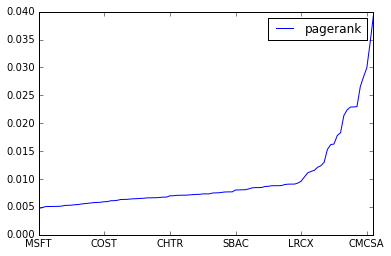

In [16]:
iso1.rankNodes("pagerank").plot()